In [112]:
#import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [113]:
data = pd.read_csv('C:/Users/HP/Desktop/revision/Machine Learning/classification/Dry_Bean_Dataset.csv')

In [114]:
data.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [115]:
#shape of the data

data.shape

(13611, 17)

In [116]:
#checking any null values are present in data

data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [117]:
#checking the duplicates

data.duplicated().sum()

68

In [118]:
#Removing the duplicates using below function

d_data = data.drop_duplicates()

In [119]:
d_data.duplicated().sum()

0

In [120]:
#overview of data

d_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [121]:
#EDA(exploratory data analysis)
d_data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

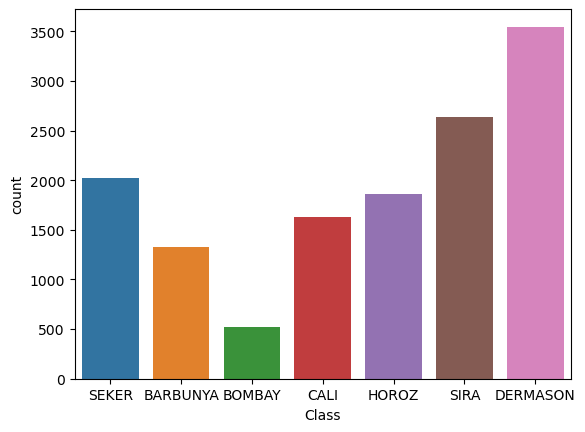

In [122]:
#viewing in the visualize form by using below function

sns.countplot(d_data['Class'])

# Obseravations

1.There are 7 kinds of dry beans where data of those beans is imbalanced.

2.Data is imbalanced so we need to balance the data by using Under_sampling process.

3.Before that convert the dependent variable data into numeric data.

In [123]:
#conver text to numeric

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
d_class = l_encoder.fit_transform(d_data['Class'])

In [124]:
#appending or adding the converted_data to the dataset

d_data['class'] = d_class

In [125]:
d_data.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5


In [126]:
#Dropping the old Class column

d_data.drop(columns=['Class'],axis=1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759696.00,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757499.00,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759321.00,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763779.00,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [127]:
#see unique dependent values

d_data['class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [128]:
#checking the relation between variables and how they are correlated to the dependent variable

d_data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
Area,1.000000,0.578189,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019,-0.475413
Perimeter,0.578189,1.000000,0.580571,0.548188,0.222027,0.224075,0.578783,0.591178,-0.017446,-0.180318,-0.318691,-0.234306,-0.516942,-0.450797,-0.235030,-0.260243,-0.299880
MajorAxisLength,0.932623,0.580571,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464,-0.456515
MinorAxisLength,0.952041,0.548188,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402,-0.458347
AspectRation,0.243698,0.222027,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598,-0.119588
Eccentricity,0.268580,0.224075,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611,-0.202824
ConvexArea,0.999940,0.578783,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302,-0.477624
EquivDiameter,0.984998,0.591178,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693,-0.481452
Extent,0.054648,-0.017446,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622,-0.030855
Solidity,-0.197333,-0.180318,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150,0.323356


<AxesSubplot:>

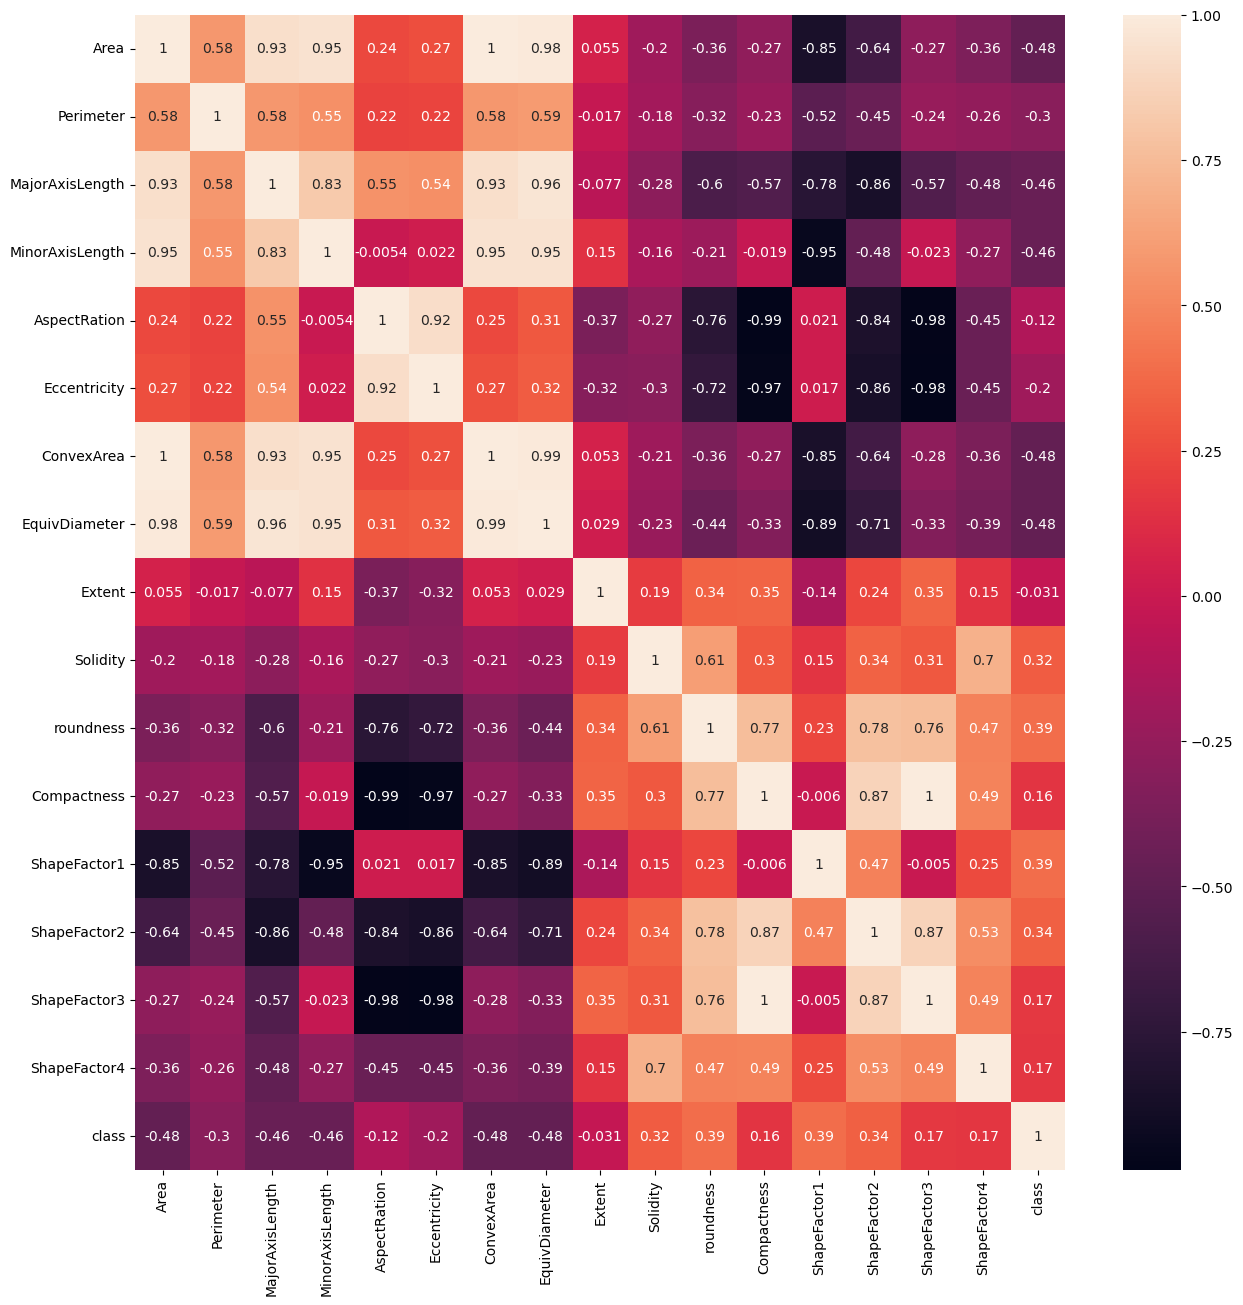

In [129]:
#for better understanding viewing in visualize form

plt.figure(figsize=(15,15))
sns.heatmap(d_data.corr(), annot=True)

In [130]:
#based on correlation droping few columns

dry_data = d_data.drop(columns=(['AspectRation', 'Extent', 'Compactness', 'ShapeFactor3', 'ShapeFactor4','Class']), axis=1)

In [131]:
dry_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   Eccentricity     13543 non-null  float64
 5   ConvexArea       13543 non-null  int64  
 6   EquivDiameter    13543 non-null  float64
 7   Solidity         13543 non-null  float64
 8   roundness        13543 non-null  float64
 9   ShapeFactor1     13543 non-null  float64
 10  ShapeFactor2     13543 non-null  float64
 11  class            13543 non-null  int32  
dtypes: float64(9), int32(1), int64(2)
memory usage: 1.3 MB


In [132]:
feature_names = dry_data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','Eccentricity', 'ConvexArea', 'EquivDiameter','Solidity','roundness','ShapeFactor1','ShapeFactor2']]

In [133]:
# assigning the independent and dependent values to the x & y

x = feature_names.values
y = dry_data['class'].values

In [134]:
#As we know data is imbalanced

!pip install imbalanced-learn

In [135]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus,Y_rus = rus.fit_resample(x,y)

In [136]:
#split the data

from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(X_rus,Y_rus,test_size=0.2,random_state=0)

In [137]:
#train the data with different models to get best score

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(x_train,y_train)


LogisticRegression()

In [138]:
#evaluate the model
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(x_test)
score = accuracy_score(y_test, y_pred)

print('accuracy_score is:', score)

accuracy_score is: 0.47332421340629277


In [139]:
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier()
k_model.fit(x_train, y_train)

#evaluate the model
from sklearn.metrics import accuracy_score
y_pred = k_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.7893296853625171

In [140]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

nav_model = GaussianNB()
nav_model.fit(x_train,y_train)


#evaluate the model
from sklearn.metrics import accuracy_score
y_pred = nav_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
score


0.7236662106703147

In [141]:
nav_m_model = MultinomialNB()
nav_m_model.fit(x_train,y_train)

#evaluate the model
from sklearn.metrics import accuracy_score
y_pred = nav_m_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.38303693570451436

In [142]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dec_model = DecisionTreeClassifier()
dec_model.fit(x_train, y_train)

#evaluate the model
from sklearn.metrics import accuracy_score
y_pred = dec_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.8905608755129959

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

#evaluate the model
from sklearn.metrics import accuracy_score
y_pred = svc_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

In [95]:
from sklearn.ensemble import RandomForestClassifier

ran_model = RandomForestClassifier()
ran_model.fit(x_train, y_train)

#evaluate the model
from sklearn.metrics import accuracy_score
y_pred = ran_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.9069767441860465

In [103]:
# Among all Random forest given the best score

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   0,  12,   0,   0,   0,   2],
       [  0, 110,   0,   0,   0,   0,   0],
       [  8,   0,  92,   0,   0,   0,   0],
       [  0,   0,   0,  84,   0,   2,  13],
       [  2,   0,   4,   1,  85,   0,   3],
       [  0,   0,   0,   3,   0, 103,   3],
       [  3,   0,   0,  10,   0,   2,  87]], dtype=int64)

[Text(0.5, 58.7222222222222, 'Predicted'),
 Text(158.22222222222223, 0.5, 'Actual')]

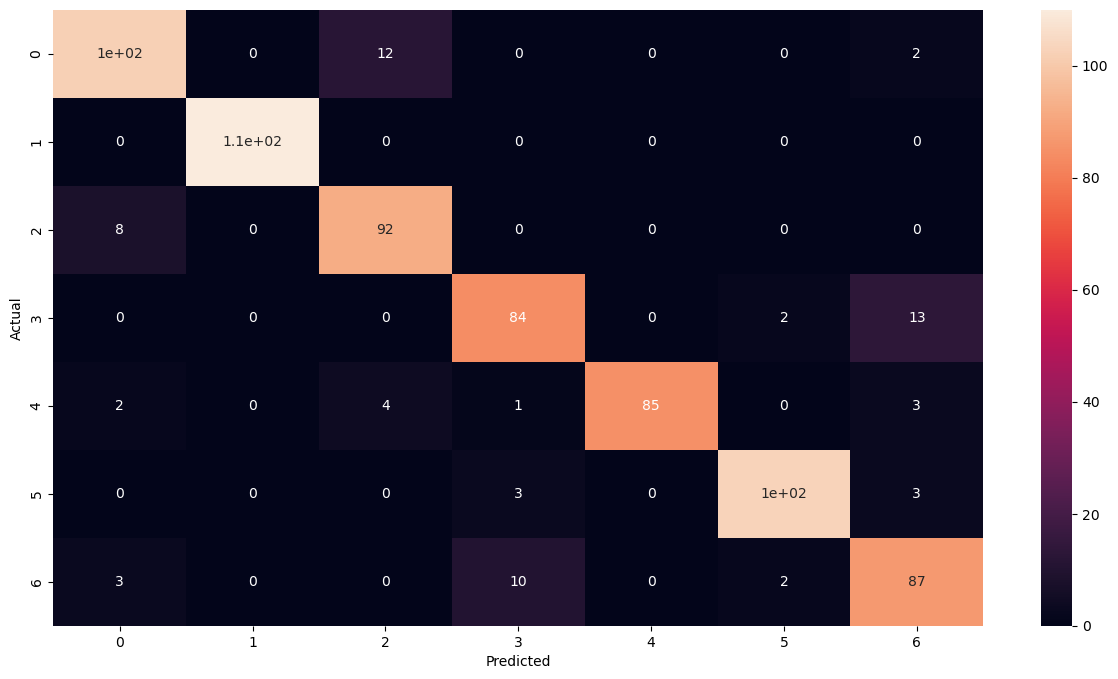

In [111]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True).set(xlabel='Predicted', ylabel= 'Actual')

In [107]:
#summary of evaluate data

cls_rpt = classification_report(y_test,y_pred)

print(cls_rpt)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       116
           1       1.00      1.00      1.00       110
           2       0.85      0.92      0.88       100
           3       0.86      0.85      0.85        99
           4       1.00      0.89      0.94        95
           5       0.96      0.94      0.95       109
           6       0.81      0.85      0.83       102

    accuracy                           0.91       731
   macro avg       0.91      0.91      0.91       731
weighted avg       0.91      0.91      0.91       731

